In [1]:
install_ntl = True
if install_ntl:
    print("pull personal_gkyl_scripts repository")
    %pip install --upgrade pip
    !git -C ~/programming/ninetails/ pull
    !sh ~/programming/ninetails/install.sh >  install.log

import numpy as np
import os, sys
import ninetails as ntl

pull personal_gkyl_scripts repository
Note: you may need to restart the kernel to use updated packages.
Already up to date.


/Users/ahoffmann/.pyenv/versions/3.12.2/lib/python3.12/site-packages/ninetails/fastfouriertransform.py:8: UserWarning: CuPy not found. GPU FFTs will not be available.
  warnings.warn("CuPy not found. GPU FFTs will not be available.")


In [ ]:
simulation = ntl.Simulation()
simulation.set_max_time(1000.0)

In [3]:
simulation.run()

Integrating using RK4 method...
Integration completed in 15.75 seconds.


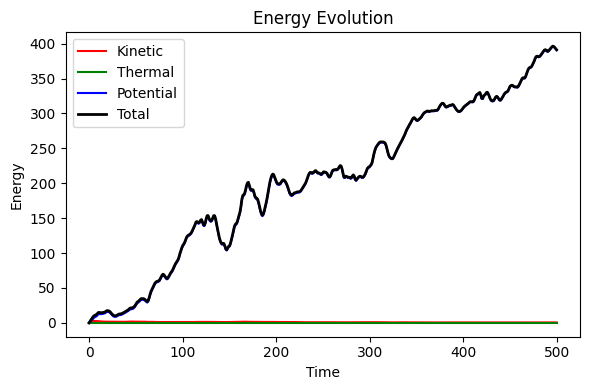

In [4]:
simulation.plotter.energy_evolution()

In [5]:
simulation.plotter.growth_rates()

IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed